# Statistics Basics

Descriptive statistics are measures that summarize important features of data, often with a single number. Producing descriptive statistics is a common first step to take after cleaning and preparing a data set for analysis.

## Measures of Center
Measures of center are statistics that give us a sense of the "middle" of a numeric variable. In other words, centrality measures give you a sense of a typical value you'd expect to see. Common measures of center include the mean, median and mode.

The mean is simply an average: the sum of the values divided by the total number of records. As we've seen in previous lessons we can use `df.mean()` to get the mean of each column in a DataFrame:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from ggplot import mtcars

In [3]:
mtcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")

In [4]:
mtcars.head(10)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### Statistics Mean
If you’re trying to find the mean in statistics, what you are looking for most of the time is the average of a data set (the Arithmetic Mean). 

To find the mean: add up all the numbers and then divide by the number of items in the set. For example, 

The average of 1, 2, 6, 8, 10 is:


1 + 2 + 6 + 8 + 10 / 5 = 5.4. 

### Mean vs Median

Both are measures of where the center of a data set lies, but they are usually different numbers. For example, take this list of numbers: 10,10,20,40,70.

- The ***mean*** (average) is found by adding all of the numbers together and dividing by the number of items in the set: 10 + 10 + 20 + 40 + 70 / 5 = 30.
    
- The ***median*** is found by ordering the set from lowest to highest and finding the exact middle. The median is just the middle number: 20.

Sometimes the two will be the same number. For example, the data set 1,2,4,6,7 has an average of 1 + 2 + 4 + 6 + 7 / 5 = 4 and a median (a middle) of 4.

In [5]:
mtcars.index = mtcars["model"]
mtcars.mean()                 # Get the mean of each column

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

We can also get the means of each row by supplying an axis argument:

In [6]:
mtcars.mean(axis=1).head(10)    # Get the mean of each row

model
Mazda RX4            29.907273
Mazda RX4 Wag        29.981364
Datsun 710           23.598182
Hornet 4 Drive       38.739545
Hornet Sportabout    53.664545
Valiant              35.049091
Duster 360           59.720000
Merc 240D            24.634545
Merc 230             27.233636
Merc 280             31.860000
dtype: float64

The median of a distribution is the ***value where 50% of the data lies below it and 50% lies above it***. 
- In essence, the median splits the data in half. 
- The median is also known as the 50% percentile since 50% of the observations are found below it. 


As we've seen previously, you can get the median using the `df.median()` function:

In [7]:
mtcars.median()                 # Get the median of each column

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

Again, we could get the row medians across each row by supplying the argument `axis=1`.

Although the mean and median both give us some sense of the center of a distribution, ***they aren't always the same***. 

- The median always gives us a value that splits the data into two halves while the mean is a numeric average so extreme values can have a significant impact on the mean. 

    - In a symmetric distribution, the mean and median will be the same. 
    
Let's investigate with a density plot:

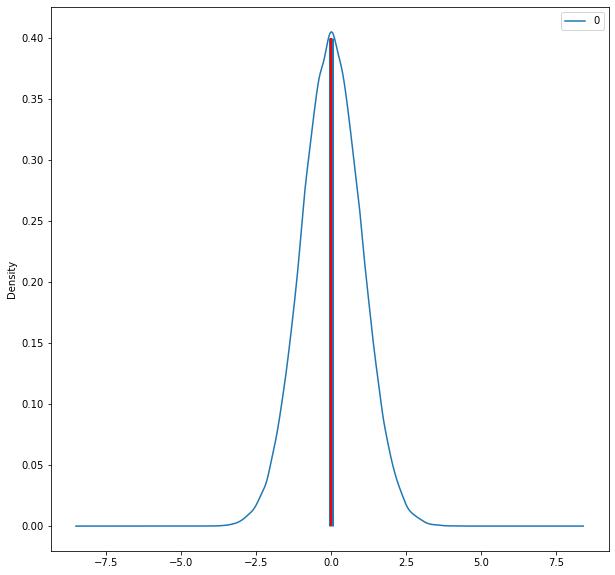

In [8]:
norm_data = pd.DataFrame(np.random.normal(size=100000))

norm_data.plot(kind="density", figsize=(10,10))

# Plot black line at mean
plt.vlines(norm_data.mean(), ymin=0, ymax=0.4, linewidth=5.0)

# Plot red line at median
plt.vlines(norm_data.median(), ymin=0, ymax=0.4, linewidth=2.0, color="red")

In the plot the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean.

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:

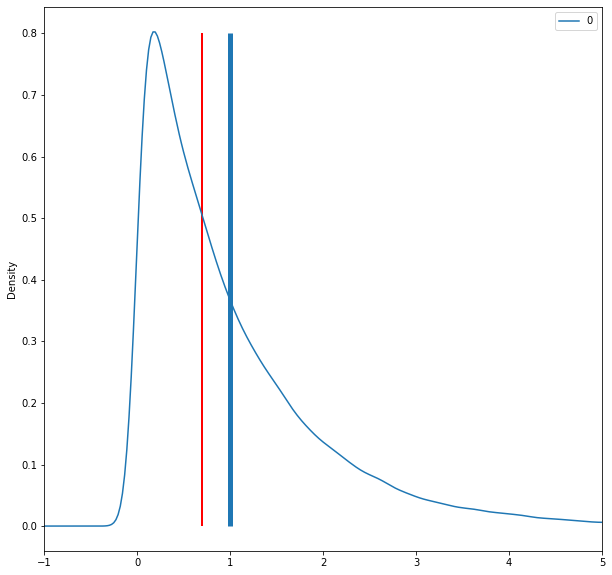

In [9]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

skewed_data.plot(kind="density", figsize=(10,10), xlim=(-1,5))


plt.vlines(skewed_data.mean(), ymin=0, ymax=0.8, linewidth=5.0) # Plot black line at mean

plt.vlines(skewed_data.median(), ymin=0, ymax=0.8, linewidth=2.0, color="red") # Plot red line at median

The mean is also influenced heavily by outliers, while the median resists the influence of outliers:

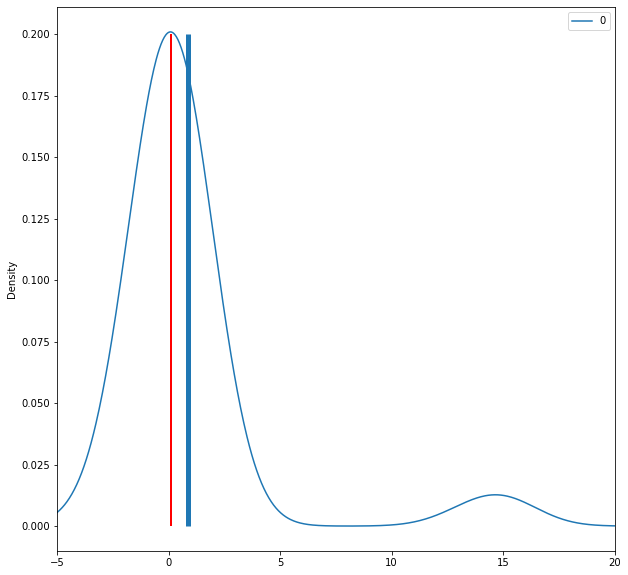

In [10]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

combined_data.plot(kind="density", figsize=(10,10), xlim=(-5,20))


plt.vlines(combined_data.mean(), ymin=0, ymax=0.2, linewidth=5.0) # Plot black line at mean

plt.vlines(combined_data.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red")   # Plot red line at median

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

### Mode
The mode of a variable is simply the value that appears most ***frequently***. Unlike mean and median, you can take the mode of a categorical variable and it is possible to have multiple modes. Find the mode with df.mode():

In [11]:
mtcars.mode().head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,AMC Javelin,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,Cadillac Fleetwood,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,Camaro Z28,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chrysler Imperial,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Datsun 710,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The columns with multiple modes (multiple values with the same count) return multiple values as the mode. Columns with no mode (no value that appears more than once) return NaN.

## Measures of Spread

Measures of spread (dispersion) are statistics that describe how data ***varies***. 

- While measures of center give us an idea of the typical value, *measures of spread give us a sense of how much the data tends to diverge from the typical value.*

One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations:

In [12]:
max(mtcars["mpg"]) - min(mtcars["mpg"])

23.5

### Quartile

As noted earlier, the *median represents the 50th percentile of a data set*. 

- A summary of several percentiles can be used to describe a variable's spread. 
- We can extract the 
    - minimum value (0th percentile), 
    - first quartile (25th percentile), 
    - the median - second quartile (50th percentile), 
    - third quartile(75th percentile), and 
    - maximum value (100th percentile) 
    
using the `quantile()` function:

In [13]:
five_num = [mtcars["mpg"].quantile(0),   
            mtcars["mpg"].quantile(0.25),
            mtcars["mpg"].quantile(0.50),
            mtcars["mpg"].quantile(0.75),
            mtcars["mpg"].quantile(1)]

five_num

[10.4, 15.425, 19.2, 22.8, 33.9]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by `df.describe()`:

In [14]:
mtcars["mpg"].describe()

count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64

**Interquartile (IQR)** range is another common measure of ***spread***. 

- IQR is the distance between the 3rd quartile and the 1st quartile:

In [15]:
mtcars["mpg"].quantile(0.75) - mtcars["mpg"].quantile(0.25)

7.375

The [boxplots](http://www.physics.csbsju.edu/stats/box2.html) we learned to create in the lesson on plotting are just visual representations of the five number summary and IQR:

Text(0.7, 19.5, 'IQR')

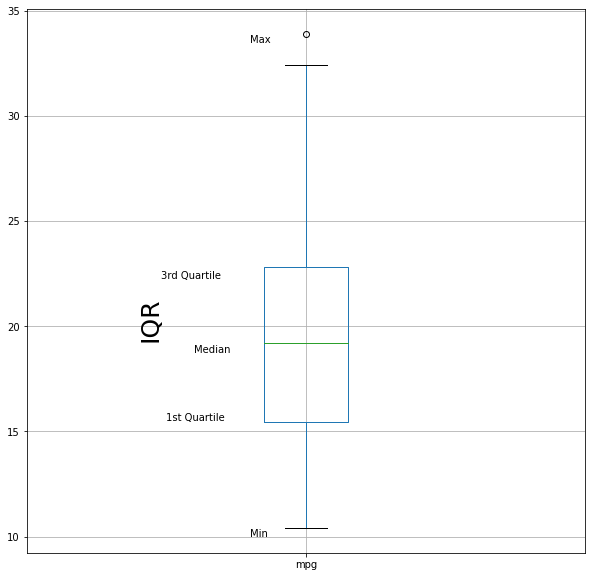

In [16]:
mtcars.boxplot(column="mpg",
               return_type='axes',
               figsize=(10,10))

plt.text(x=0.74, y=22.25, s="3rd Quartile")
plt.text(x=0.8, y=18.75, s="Median")
plt.text(x=0.75, y=15.5, s="1st Quartile")
plt.text(x=0.9, y=10, s="Min")
plt.text(x=0.9, y=33.5, s="Max")
plt.text(x=0.7, y=19.5, s="IQR", rotation=90, size=25)

### Variance and Standard Deviation

Variance and standard deviation are two other common ***measures of spread.*** 


The **variance** of a distribution is the ***average of the squared deviations (differences) from the mean***. 

$$variance = \sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n}$$

<!---![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/00eb0cde84f0a838a2de6db9f382866427aeb3bf)-->

Use `df.var()` to check variance:

In [17]:
mtcars["mpg"].var()

36.32410282258065

The **standard deviation** is the ***square root of the variance***. 

$$std-dev = \sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n}}$$

Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use `df.std()` to check the standard deviation:

In [18]:
mtcars["mpg"].std()

6.026948052089105

##### Dog Example:

You and your friends have just measured the heights of your dogs (in millimeters):
dogs on graph shoulder heights

<center><img src="https://www.mathsisfun.com/data/images/statistics-dogs-graph.gif" class="center" alt="Skewness" style="width: 600px;"/></center>



The heights (at the shoulders) are: 600mm, 470mm, 170mm, 430mm and 300mm.

Find out the Mean, the Variance, and the Standard Deviation.

Your first step is to find the Mean:

$$Mean 	= 	(600 + 470 + 170 + 430 + 300)/5
  	= 	1970/5
  	= 	394$$

so the mean (average) height is 394 mm. Let's plot this on the chart:


<center><img src="https://www.mathsisfun.com/data/images/statistics-dogs-mean.gif" class="center" alt="Skewness" style="width: 600px;"/></center>


Now we calculate each dog's difference from the Mean:

$$ \sigma^2 = \frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n}$$

<center><img src="https://www.mathsisfun.com/data/images/statistics-dogs-deviation.gif" class="center" alt="Skewness" style="width: 600px;"/></center>

So the $$Variance = 21,704$$

And the Standard Deviation is just the square root of Variance, so:

$$ \sigma = \sqrt{\frac{\displaystyle\sum_{i=1}^{n}(x_i - \bar{x})^2} {n}}$$

$$ std-dev = \sigma = 147$$


And the good thing about the Standard Deviation is that it is useful. Now we can show which heights are within one Standard Deviation (147mm) of the Mean:

<center><img src="https://www.mathsisfun.com/data/images/statistics-standard-deviation.gif" class="center" alt="Skewness" style="width: 900px;"/></center>


So, using the Standard Deviation we have a "standard" way of knowing what is normal, and what is extra large or extra small.

Rottweilers are tall dogs. And Dachshunds are a bit short ... but don't tell them!

Since variance and standard deviation are both derived from the mean, they are susceptible to the influence of data *skew and outliers*. 

- [Median absolute deviation](http://www.statisticshowto.com/median-absolute-deviation/) is an alternative measure of spread based on the median, which inherits the median's robustness against the influence of skew and outliers. It is the median of the absolute value of the deviations from the median:

In [19]:
abs_median_devs = abs(mtcars["mpg"] - mtcars["mpg"].median())

abs_median_devs.median() * 1.4826

# *Note: The MAD is often multiplied by a scaling factor of 1.4826.


5.411490000000001

### Skewness and Kurtosis

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. 

- [**Skewness**](https://en.wikipedia.org/wiki/Skewness) measures the skew or asymmetry of a distribution.
- [**Kurtosis**](https://en.wikipedia.org/wiki/Kurtosis) measures the "peakedness" of a distribution.  

We won't go into the exact calculations behind skewness and kurtosis, but they are essentially just statistics that take the idea of variance a step further: 

- *while variance involves squaring deviations from the mean*, ***skewness*** *involves cubing deviations from the mean and* ***kurtosis*** *involves raising deviations from the mean to the 4th power.*

**Skewness:**
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/446px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" class="center" alt="Skewness" style="width: 1000px;"/></center>


**Kurtosis:**
<center><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pearson_type_VII_distribution_PDF.png" class="center" alt="Kurtosis" style="width: 800px;"/></center>


Pandas has built in functions for checking skewness and kurtosis, `df.skew()` and `df.kurt()` respectively:

In [20]:
mtcars["mpg"].skew()  # Check skewness

0.6723771376290805

In [21]:
mtcars["mpg"].kurt()  # Check kurtosis

-0.0220062914240855

To explore these two measures further, let's create some dummy data and inspect it:

In [23]:
norm_data = np.random.normal(size=100000)
skewed_data = np.concatenate((np.random.normal(size=35000)+2, 
                             np.random.exponential(size=65000)), 
                             axis=0)
uniform_data = np.random.uniform(1,2, size=100000)
peaked_data = np.concatenate((np.random.exponential(size=50000),
                             np.random.exponential(size=50000)*(-1)),
                             axis=0)

data_df = pd.DataFrame({"norm":norm_data,
                       "skewed":skewed_data,
                       "uniform":uniform_data,
                       "peaked":peaked_data})

<AxesSubplot:ylabel='Density'>

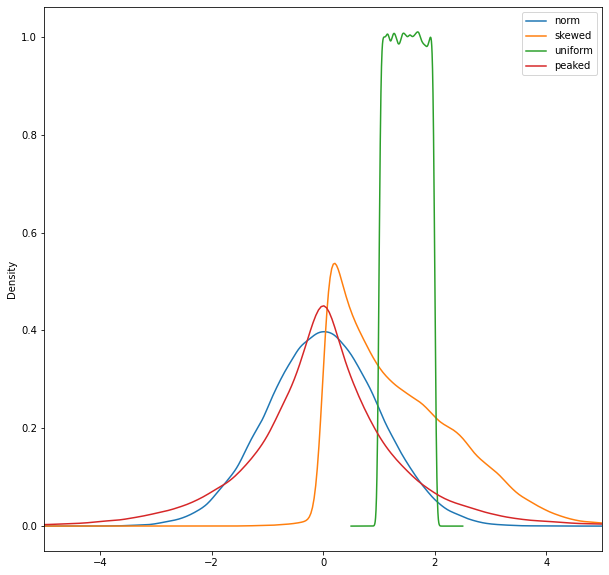

In [24]:
data_df.plot(kind="density",
            figsize=(10,10),
            xlim=(-5,5))

Now let's check the skewness of each of the distributions. Since skewness measures asymmetry, we'd expect to see low skewness for all of the distributions except the skewed one, because all the others are roughly symmetric:

In [26]:
data_df.skew()

norm       0.011733
skewed     1.001768
uniform    0.000282
peaked     0.010004
dtype: float64

Now let's check kurtosis. Since kurtosis measures peakedness, we'd expect the flat (uniform) distribution have low kurtosis while the distributions with sharper peaks should have higher kurtosis.

In [27]:
data_df.kurt()

norm      -0.016071
skewed     1.278974
uniform   -1.200797
peaked     3.034164
dtype: float64

As we can see from the output, 
- The normally distributed data has a kurtosis near zero
- The flat distribution has negative kurtosis and 
- The two pointier distributions have positive kurtosis.



### Descriptive Statistics
- Descriptive statistics help you explore features of your data, like center, spread and shape by summarizing them with numerical measurements. 
- Descriptive statistics help inform the direction of an analysis and let you communicate your insights to others quickly and succinctly. 
- In addition, certain values, like the mean and variance, are used in all sorts of statistical tests and predictive models.